In [1]:
import pykasso as pk
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


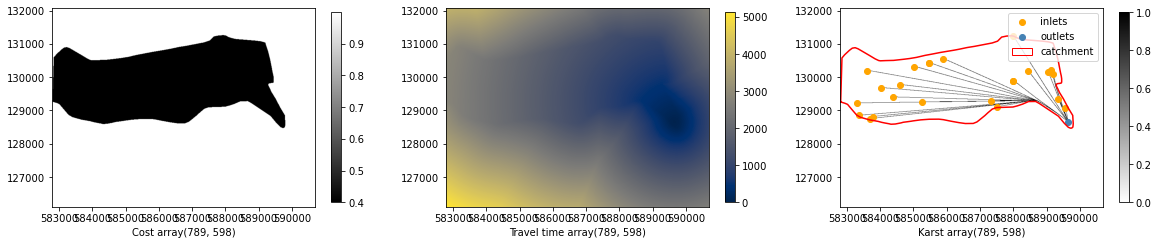

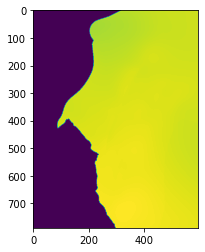


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


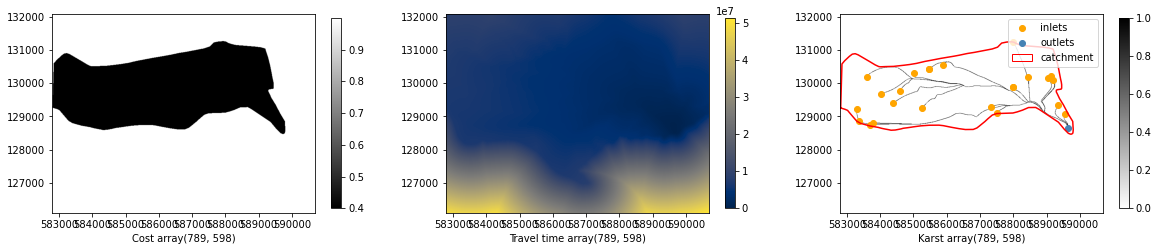

In [2]:
#1 Simple one-valley system
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml') 
#catchment.set_parameter('data_has_mask', True)                             
#catchment.update_feature('mask')
#catchment.set_parameter('orientation_mode', 'surface')                       
#catchment.update_feature('orientation')                  
catchment.compute_karst_network()
f = catchment.show()

#print(catchment.geology.data)
data = [d.data for d in catchment.geology.data if d.data_key=="surface"][0]
import matplotlib.pyplot as plt
im = plt.imshow(data)
plt.show()


#print(topography)
#f = catchment.show_catchment(data_key='topography')

catchment.set_parameter('algorithm', 'Riemann2')
catchment.compute_karst_network()
f = catchment.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

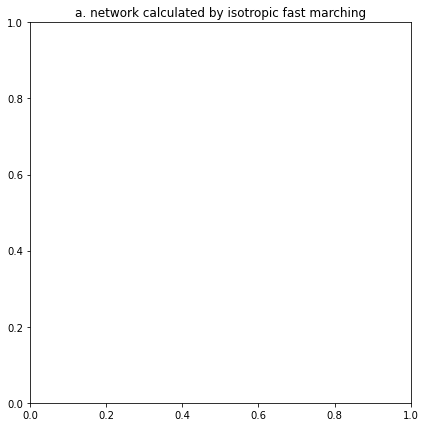

In [5]:
#Plot anisotropic vs. isotropic with no fractures and no iteration
fractures = [d.data for d in catchment.geology.data if d.data_key=="fractures"][0]
surface = [d.data for d in catchment.geology.data if d.data_key=="surface"][0]
topography = [d.data for d in catchment.geology.data if d.data_key=="topography"][0]


#Set up a figure, and a colormap to plot fractures and conduits with a transparent background
###########################
f = plt.figure(figsize=(15,15))

cmap_frac = matplotlib.colors.ListedColormap(['whitesmoke'])   #fractures will be off-white
cmap_frac.set_under(color='w', alpha=0)                        #all values under range will be transparent
cmap_cond = matplotlib.colors.ListedColormap(['k'])           #conduits will be black
cmap_cond.set_under(color='w', alpha=0)                       #all values under range will be transparent
frac = fractures.copy() #get a copy of the fractures array
frac[frac<1] = -1                                         #replace all non-fracture cells with an out of bounds value to make them transparent

#Isotropic
###################
ax = f.add_subplot(121, aspect='equal')
ax.set_title('a. network calculated by isotropic fast marching')

plt.imshow(surface[:,:,0].T, origin="lower", extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)
#plt.imshow(frac, origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)

c = plt.contour(catchment.grid.X[:,:,0], catchment.grid.Y[:,:,0], topography, colors=['k'], alpha=0.5, linewidths=1)

plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=False, legend=False, color='k', mask=False)

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')


#Anisotropic
###############
ax = f.add_subplot(122, aspect='equal')
ax.set_title('b. network calculated by anisotropic fast marching')

plt.imshow(geology[:,:,0].T, origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)
#plt.imshow(frac,origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)
c = plt.contour(catchment.grid.X[:,:,0],catchment.grid.Y[:,:,0], topography, colors=['k'], alpha=0.5, linewidths=1)

plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=['inlets'], plot_nodes=False, legend=False, color='k')

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

#Custom legend
###############
legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, alpha=1,   label='conduit'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=1, alpha=0.5, label='contour'),
          #matplotlib.patches.Patch(facecolor='whitesmoke', label='fractures'),
          matplotlib.patches.Patch(facecolor='lightgray',  label='limestone'),
          matplotlib.patches.Patch(facecolor='gray',       label='shale'),
          matplotlib.patches.Patch(facecolor='dimgray',    label='granite')]
plt.legend(handles=legend, loc=[1.01,0.35])

C:\Users\measdaya\Anaconda3\envs\pykasso\lib\site-packages\ipykernel_launcher.py:26: UserWarning: No contour levels were found within the data range.
C:\Users\measdaya\Anaconda3\envs\pykasso\lib\site-packages\ipykernel_launcher.py:42: UserWarning: No contour levels were found within the data range.


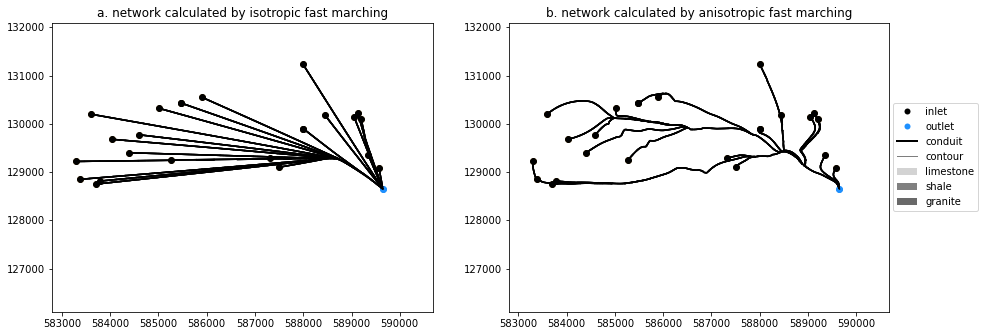

In [4]:
#Plot anisotropic vs. isotropic with no fractures and no iteration
fractures = [d.data for d in catchment.geology.data if d.data_key=="fractures"][0]
geology = [d.data for d in catchment.geology.data if d.data_key=="geology"][0]
topography = [d.data for d in catchment.geology.data if d.data_key=="topography"][0]


#Set up a figure, and a colormap to plot fractures and conduits with a transparent background
###########################
f = plt.figure(figsize=(15,15))

cmap_frac = matplotlib.colors.ListedColormap(['whitesmoke'])   #fractures will be off-white
cmap_frac.set_under(color='w', alpha=0)                        #all values under range will be transparent
cmap_cond = matplotlib.colors.ListedColormap(['k'])           #conduits will be black
cmap_cond.set_under(color='w', alpha=0)                       #all values under range will be transparent
frac = fractures.copy() #get a copy of the fractures array
frac[frac<1] = -1                                         #replace all non-fracture cells with an out of bounds value to make them transparent

#Isotropic
###################
ax = f.add_subplot(121, aspect='equal')
ax.set_title('a. network calculated by isotropic fast marching')

plt.imshow(geology[:,:,0].T, origin="lower", extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)
#plt.imshow(frac, origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)

c = plt.contour(catchment.grid.X[:,:,0], catchment.grid.Y[:,:,0], topography, colors=['k'], alpha=0.5, linewidths=1)

plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=False, legend=False, color='k', mask=False)

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')


#Anisotropic
###############
ax = f.add_subplot(122, aspect='equal')
ax.set_title('b. network calculated by anisotropic fast marching')

plt.imshow(geology[:,:,0].T, origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)
#plt.imshow(frac,origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)
c = plt.contour(catchment.grid.X[:,:,0],catchment.grid.Y[:,:,0], topography, colors=['k'], alpha=0.5, linewidths=1)

plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

catchment.show_network(ax=ax, data=catchment.karst_simulations[1], simplify=False, labels=[], plot_nodes=False, legend=False, color='k', mask=False)

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

#Custom legend
###############
legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, alpha=1,   label='conduit'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=1, alpha=0.5, label='contour'),
          #matplotlib.patches.Patch(facecolor='whitesmoke', label='fractures'),
          matplotlib.patches.Patch(facecolor='lightgray',  label='limestone'),
          matplotlib.patches.Patch(facecolor='gray',       label='shale'),
          matplotlib.patches.Patch(facecolor='dimgray',    label='granite')]
plt.legend(handles=legend, loc=[1.01,0.35])

In [ ]:
#Reload & update model with appropriate settings:
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml')     #load settings file
catchment.set_parameter('data_has_mask', True)                             
catchment.update_feature('mask')
catchment.set_parameter('fractures_mode','random')     #set fracture mode to randomly generate a fracture network
catchment.update_feature('fractures')                  #when altering the model's geologic setting, need to update after making changes
catchment.set_parameter('inlets_importance',[1,2,2])   #assign the first two inlets to the first outlet, and the remaining three inlets to the second outlet
catchment.set_parameter('algorithm', 'Riemann2')       #set the fast-marching algorithm (Riemann is one version of an anisotropic algorith, 2 indicates 2D)
catchment.set_parameter('orientation_mode', 'surface') #use the lower surface of the karst unit as the anisotropy field
catchment.update_feature('orientation')                #update model
catchment.compute_karst_network()                      #run the model to generate the karst network
catchment.show()

fractures    = [d.data for d in catchment.geology.data if d.data_key=="fractures"][0][:,:,0].T
geology      = [d.data for d in catchment.geology.data if d.data_key=="geology"][0][:,:,0].T
topography   = [d.data for d in catchment.geology.data if d.data_key=="topography"][0].T
surface      = [d.data for d in catchment.geology.data if d.data_key=="surface"][0].T
orientationx = [d.data for d in catchment.geology.data if d.data_key=="orientationx"][0].T
orientationy = [d.data for d in catchment.geology.data if d.data_key=="orientationy"][0].T

f = plt.figure(figsize=(15,15))
d = np.transpose(catchment.maps['cost'][-1])
plt.imshow(d)
plt.colorbar()

#Inputs
###############
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(121, aspect='equal')
ax.set_title('Inputs')

plt.imshow(geology, origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)

c = plt.contour(catchment.grid.X[:,:,0].T,catchment.grid.Y[:,:,0].T, surface, colors=['k'], alpha=0.5, linewidths=1)

plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=1, alpha=0.5, label='contour')]
plt.legend(handles=legend, loc=[1.01,0.5])

#Cost & anisotropy 
########################
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(121, aspect='equal')
ax.set_title('Cost array & anisotropy field (lower surface of karst)')

im = plt.imshow(catchment.maps['alpha'][0].T, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')
skip=(slice(None,None,5),slice(None,None,5))

q = plt.quiver(catchment.grid.X[:,:,0].T[skip], catchment.grid.Y[:,:,0].T[skip], -1*orientationx[skip], -1*orientationy[skip], scale=4)

plt.colorbar(im, aspect=15, shrink=0.3, label='cost')
legend = [matplotlib.lines.Line2D([0], [0], marker='o',  color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], marker=None, color='k', label='vector'),
          matplotlib.patches.Patch(facecolor='silver',   label='cost')]
plt.legend(handles=legend, loc=[1.3,0.4])

#Inlet iteration
###############
f = plt.figure(figsize=(15,15))

frac = fractures.copy() #get a copy of the fractures array
frac[frac<1] = -1                                         #replace all non-fracture cells with an out of bounds value to make them transparent
cond = catchment.maps['karst'].copy()                     #get a copy of the karst array
cond = cond.astype('int')                                 #convert to integers to be able to manipulate
cond[cond<1] = -1                                         #replace all non-conduit cells with an out of bounds value to make them transparent

ax = f.add_subplot(131, aspect='equal')
ax.set_title('iteration = 1')
plt.imshow(geology, origin='lower', extent=catchment.grid.extent, cmap='gray_r',  vmin=0, vmax=5)
plt.imshow(frac,    origin='lower', extent=catchment.grid.extent, cmap=cmap_frac, vmin=0, vmax=1)
plt.imshow(cond[0].T, origin='lower', extent=catchment.grid.extent, cmap=cmap_cond, vmin=0, vmax=1)
c = plt.contour(catchment.grid.X[:,:,0].T,catchment.grid.Y[:,:,0].T, surface, colors=['k'], alpha=0.5, linewidths=1)
plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

ax = f.add_subplot(132, aspect='equal')
ax.set_title('iteration = 2')
plt.imshow(geology, origin='lower', extent=catchment.grid.extent, cmap='gray_r',  vmin=0, vmax=5)
plt.imshow(frac,    origin='lower', extent=catchment.grid.extent, cmap=cmap_frac, vmin=0, vmax=1)
plt.imshow(cond[1].T, origin='lower', extent=catchment.grid.extent, cmap=cmap_cond, vmin=0, vmax=1)
c = plt.contour(catchment.grid.X[:,:,0].T,catchment.grid.Y[:,:,0].T, surface, colors=['k'], alpha=0.5, linewidths=1)
plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

ax = f.add_subplot(133, aspect='equal')
ax.set_title('iteration = 3')
plt.imshow(geology, origin='lower', extent=catchment.grid.extent, cmap='gray_r',  vmin=0, vmax=5)
plt.imshow(frac,    origin='lower', extent=catchment.grid.extent, cmap=cmap_frac, vmin=0, vmax=1)
plt.imshow(cond[2].T, origin='lower', extent=catchment.grid.extent, cmap=cmap_cond, vmin=0, vmax=1)
c = plt.contour(catchment.grid.X[:,:,0].T,catchment.grid.Y[:,:,0].T, surface, colors=['k'], alpha=0.5, linewidths=1)
plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=1, alpha=0.5, label='contour'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=3,            label='conduit'),
          matplotlib.patches.Patch(facecolor='whitesmoke', label='fractures')]
plt.legend(handles=legend, loc=[1.01,0.15])

#Outputs: network, simplified network, and table of statistics.
###############
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(121, aspect='equal')
ax.set_title('a. karst network')

plt.imshow(catchment.maps['outlets'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=0)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=True, legend=False, color='k')
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

ax = f.add_subplot(122, aspect='equal')
ax.set_title('b. simplified karst network')

plt.imshow(catchment.maps['outlets'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=0)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=True, labels=[], plot_nodes=True, legend=False, color='k')

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], marker='.', color='none', markerfacecolor='k', markeredgecolor='none', label='node'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, label='edge')]
plt.legend(handles=legend, loc=[1.01,0.5])

print('\n Network statistics:')
catchment.karst_simulations[0].stats